In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\training.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVR_FULLDATA.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,name_length,is_organic,quantity_value,quantity_unit_encoded,category_depth,country_count,product_age_days,created_month,main_category_encoded,nova_group,y_true,y_pred_ovr
0,0,0,-0.691811,-0.121809,-1.138126,-1.013055,-0.069824,-0.588663,0.954730,0.590746,-1.202998,5,4,4
1,1,1,-1.162028,-0.121809,-0.846880,-0.425509,-1.835039,-0.180838,0.674675,0.890838,1.126987,3,2,2
2,2,2,-0.691811,-0.121809,-1.272881,0.833518,-0.364026,-0.588663,0.077223,0.890838,-1.202998,1,0,0
3,3,3,-0.221594,-0.121809,-1.277228,0.833518,-0.069824,-0.588663,1.276997,0.890838,-1.202998,1,0,0
4,4,4,-1.162028,-0.121809,-1.138126,-1.013055,-0.364026,-0.588663,-0.105422,-0.909710,-1.116914,5,4,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           13120 non-null  int64  
 1   Unnamed: 0             13120 non-null  int64  
 2   name_length            13120 non-null  float64
 3   is_organic             13120 non-null  float64
 4   quantity_value         13120 non-null  float64
 5   quantity_unit_encoded  13120 non-null  float64
 6   category_depth         13120 non-null  float64
 7   country_count          13120 non-null  float64
 8   product_age_days       13120 non-null  float64
 9   created_month          13120 non-null  float64
 10  main_category_encoded  13120 non-null  float64
 11  nova_group             13120 non-null  int64  
 12  y_true                 13120 non-null  int64  
 13  y_pred_ovr             13120 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 1.4 MB


# RandomForestClassifier +  TRAINING + OVR

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# X va y ajratamiz
X = df.drop('nova_group', axis=1)
y = df['nova_group']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Baholash
y_pred = rf.predict(X_val)
print("📊 Random Forest Accuracy :", accuracy_score(y_val, y_pred))
print("📉 Validation confusion_matrix: ", confusion_matrix(y_val, y_pred))

📊 Random Forest Accuracy : 1.0
📉 Validation confusion_matrix:  [[530   0   0   0   0]
 [  0 552   0   0   0]
 [  0   0 521   0   0]
 [  0   0   0 524   0]
 [  0   0   0   0 497]]


# DecisionTreeClassifier +  TRAINING + OVR

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# X va y ajratamiz
X = df.drop('nova_group', axis=1)
y = df['nova_group']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 × 0.8 = 0.2

# 🌲 Decision Tree modeli
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 🔍 Baholash
y_pred = dt.predict(X_val)

# 📊 Natijalar
print("📊 Decision Tree Accuracy :", accuracy_score(y_val, y_pred))
print("📉 Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


📊 Decision Tree Accuracy : 1.0
📉 Validation Confusion Matrix:
 [[530   0   0   0   0]
 [  0 552   0   0   0]
 [  0   0 521   0   0]
 [  0   0   0 524   0]
 [  0   0   0   0 497]]


# LogisticRegression +  TRAINING + OVR

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# X va y ajratamiz
X = df.drop('nova_group', axis=1)
y = df['nova_group']

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 🔹 Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# 🔍 Baholash
y_pred = log_reg.predict(X_val)

# 📊 Natijalar
print("📊 Logistic Regression Accuracy :", accuracy_score(y_val, y_pred))
print("📉 Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression Accuracy : 0.9523628048780488
📉 Validation Confusion Matrix:
 [[508  22   0   0   0]
 [  0 538  14   0   0]
 [  0  10 455  56   0]
 [  0   0  11 503  10]
 [  0   0   0   2 495]]


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBClassifier  +  TRAINING + OVR

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import pandas as pd

# X va y ajratamiz
X = df.drop('nova_group', axis=1)
y = df['nova_group']

# 🧩 Sinflarni 0 dan boshlaydigan qilib o‘zgartiramiz
y = y.astype(int) - 1   # [1,2,3,4,5] -> [0,1,2,3,4]

# Train / Validation / Test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 🔹 XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=len(y.unique())
)

# Modelni o‘qitamiz
xgb_model.fit(X_train, y_train)

# Bashorat
y_pred = xgb_model.predict(X_val)

# 📊 Natijalar
print("📊 XGBoost Accuracy:", accuracy_score(y_val, y_pred))
print("📉 Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


📊 XGBoost Accuracy: 1.0
📉 Validation Confusion Matrix:
 [[530   0   0   0   0]
 [  0 552   0   0   0]
 [  0   0 521   0   0]
 [  0   0   0 524   0]
 [  0   0   0   0 497]]


# Jami: Natijalarni Taqqoslash 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import plotly.graph_objects as go

# 1. X va y
X = df.drop('nova_group', axis=1)
y = df['nova_group']

# 🧩 XGBoost uchun sinflarni 0 dan boshlash
y = y.astype(int) - 1

# 2. Train, validation, test bo'lish
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 3. Modellar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective='multi:softmax',
        num_class=len(y.unique())
    )
}

# 4. Natijalarni yig‘ish
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds, average='weighted')
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

# 5. Jadval shakllantirish
results_df = pd.DataFrame(results)

# 6. Eng yaxshi va eng yomon aniqlik topish
best_model_index = results_df['Accuracy'].idxmax()
worst_model_index = results_df['Accuracy'].idxmin()

# 7. Ranglar tayyorlash
colors = ['lightgray'] * len(results_df)
colors[best_model_index] = 'lightgreen'  # ✅ eng yaxshi model
colors[worst_model_index] = 'crimson'    # ❌ eng yomon model

# 8. Plotly jadvali
fig = go.Figure(data=[go.Table(
    header=dict(values=list(results_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[results_df[col] for col in results_df.columns],
               fill_color=[colors, colors, colors],
               align='left'))
])

fig.update_layout(title='Classification modellari natijalari: Accuracy va F1 Score')
fig.show()


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Cros Validation Tekshirish Natijalari 

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# 🌲 Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 📊 Accuracy bo‘yicha 5-fold cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("✅ Accuracy (5-fold):", cv_scores)
print("📈 O‘rtacha Accuracy:", np.mean(cv_scores))

# 🔍 Cross-validation prediksiyalar
y_pred_cv = cross_val_predict(rf_clf, X, y, cv=5)

# 📊 Classification report
print("\n📊 Classification Report:")
print(classification_report(y, y_pred_cv))

# 🧩 Confusion matrix (to‘g‘ri versiya)
unique_classes = np.unique(y)
conf_mat = confusion_matrix(y, y_pred_cv, labels=unique_classes)
conf_df = pd.DataFrame(conf_mat, index=unique_classes, columns=unique_classes)

print("\n🔢 Confusion Matrix:")
print(conf_df)


✅ Accuracy (5-fold): [1.         1.         1.         1.         0.87842988]
📈 O‘rtacha Accuracy: 0.9756859756097562

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2624
           1       1.00      1.00      1.00      2624
           2       0.89      1.00      0.94      2624
           3       1.00      0.88      0.94      2624
           4       1.00      1.00      1.00      2624

    accuracy                           0.98     13120
   macro avg       0.98      0.98      0.98     13120
weighted avg       0.98      0.98      0.98     13120


🔢 Confusion Matrix:
      0     1     2     3     4
0  2624     0     0     0     0
1     0  2624     0     0     0
2     0     0  2624     0     0
3     0     0   319  2305     0
4     0     0     0     0  2624


# Shap Value Bo`yicha Taxliliy Xulosalar 

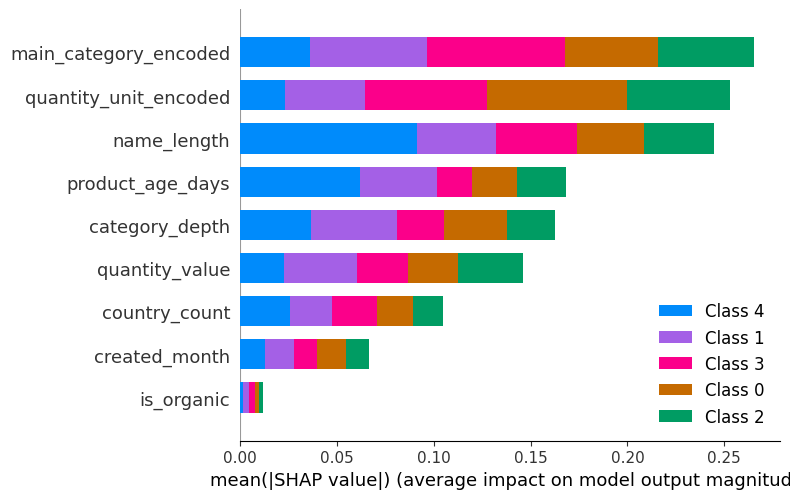

In [4]:
# 🔹 Kutubxonalarni chaqirish
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# 🔹 Misol DataFrame (o'zingizning df bilan almashtiring)
# df = pd.read_csv("your_data.csv")
X = df.drop(columns=['nova_group', 'y_true', 'y_pred_ovr', 'Unnamed: 0', 'Unnamed: 0.1'])
y = df['nova_group']

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 RandomForest modelini fit qilish
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 SHAP TreeExplainer yaratish
explainer = shap.TreeExplainer(rf_model, feature_perturbation="tree_path_dependent")

# 🔹 Tezroq natija uchun random sample (masalan, 1000 ta satr)
X_sample = X_test.sample(n=min(1000, len(X_test)), random_state=42)

# 🔹 SHAP values hisoblash (additivity tekshiruvini o'chirdik)
shap_values = explainer(X_sample, check_additivity=False)

# 🔹 Multi-class bo'lsa summary_plot har bir class uchun
if isinstance(shap_values, list):
    for i, class_shap in enumerate(shap_values):
        plt.figure(figsize=(8,6))
        shap.summary_plot(class_shap, X_sample, plot_type="bar", show=True)
        plt.title(f"SHAP Summary - Class {i}")
else:
    plt.figure(figsize=(8,6))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)



# SHAP Analysis Xulosasi

Ushbu grafika RandomForest multi-class classification modelining har bir ustun (feature) ning model chiqishiga o'rtacha ta'sirini (mean absolute SHAP value) ko'rsatadi. Grafikdan quyidagi asosiy xulosalarni chiqarish mumkin:

1. **Eng muhim ustunlar:**
   - `main_category_encoded` va `quantity_unit_encoded` eng yuqori o'rtacha SHAP qiymatiga ega, ya'ni modelning klassifikatsiyasiga eng katta ta'sir ko'rsatadi.
   - `name_length` ham muhim, lekin oldingilariga nisbatan biroz kamroq.

2. **O'rtacha ta'sir:**
   - `product_age_days`, `category_depth` va `quantity_value` ham model chiqishiga sezilarli ta'sir ko'rsatadi.
   - `country_count` va `created_month` nisbatan kamroq ta'sirga ega.
   
3. **Kam ta'sir qiluvchi ustunlar:**
   - `is_organic` ustuni eng kam ta'sirga ega, ya'ni model uchun bu feature deyarli ahamiyatsiz.

4. **Multi-class taqsimot:**
   - Grafik har bir class uchun rang bilan ko'rsatilgan. Masalan:
     - `Class 4` (`ko'k`) `name_length` va `product_age_days`da sezilarli rol o'ynaydi.
     - `Class 3` (`qizil/pink`) `main_category_encoded` va `quantity_unit_encoded`da kuchli ta'sir ko'rsatadi.
   - Bu, turli klasslar uchun turli ustunlar muhimligini ko'rsatadi.

5. **Umumiy xulosa:**
   - Model ko'proq `category` va `quantity` bilan bog'liq ustunlarga tayanadi.
   - `is_organic` kabi ba'zi feature’lar model natijasiga kam ta'sir qiladi va ularni keyingi feature engineering jarayonida qayta ko'rib chiqish mumkin.

